# Stroke Prediction

# Data exploration

Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [1]:
import pandas as pd

stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [2]:
stroke.sample(7)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
305,49003,Male,43.0,0,0,Yes,Private,Urban,146.01,31.5,smokes,0
4761,49179,Male,10.0,0,0,No,children,Rural,84.81,16.8,never smoked,0
3465,62513,Female,28.0,0,0,Yes,Private,Rural,141.16,36.7,never smoked,0
4004,54240,Female,30.0,0,0,Yes,Govt_job,Urban,61.29,24.0,Unknown,0
412,44749,Female,64.0,0,0,No,Govt_job,Rural,81.60,36.3,smokes,0
916,67864,Male,63.0,0,0,Yes,Private,Rural,57.82,28.8,formerly smoked,0
3843,51797,Female,35.0,0,0,Yes,Private,Urban,86.97,25.7,Unknown,0


In [3]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
stroke.drop(columns=['id']).describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


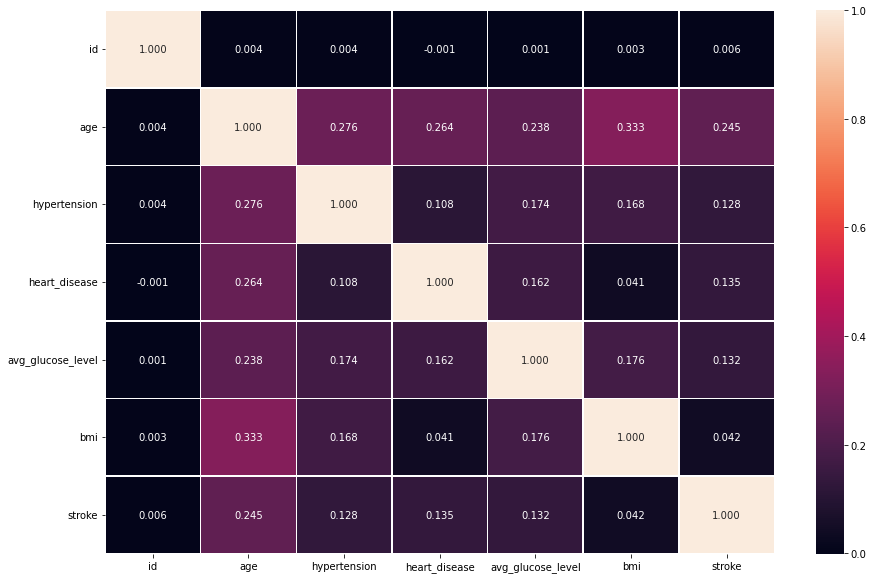

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

cor_mat=stroke.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

There is no correlation between input variables

# NA values and dummie variables

In [6]:
stroke.sort_values(['gender', 'age'], inplace=True)
stroke.reset_index(drop=True, inplace=True)

In [7]:
stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
1,61511,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
2,66772,Female,0.32,0,0,No,children,Rural,55.86,16.0,Unknown,0
3,37622,Female,0.32,0,0,No,children,Urban,108.63,19.6,Unknown,0
4,15728,Female,0.40,0,0,No,children,Rural,85.65,17.4,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,25510,Male,82.00,0,0,Yes,Self-employed,Urban,111.81,19.8,formerly smoked,0
5106,62715,Male,82.00,0,1,Yes,Private,Urban,57.56,27.5,never smoked,0
5107,19191,Male,82.00,0,0,Yes,Private,Urban,217.57,33.5,formerly smoked,0
5108,68398,Male,82.00,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0


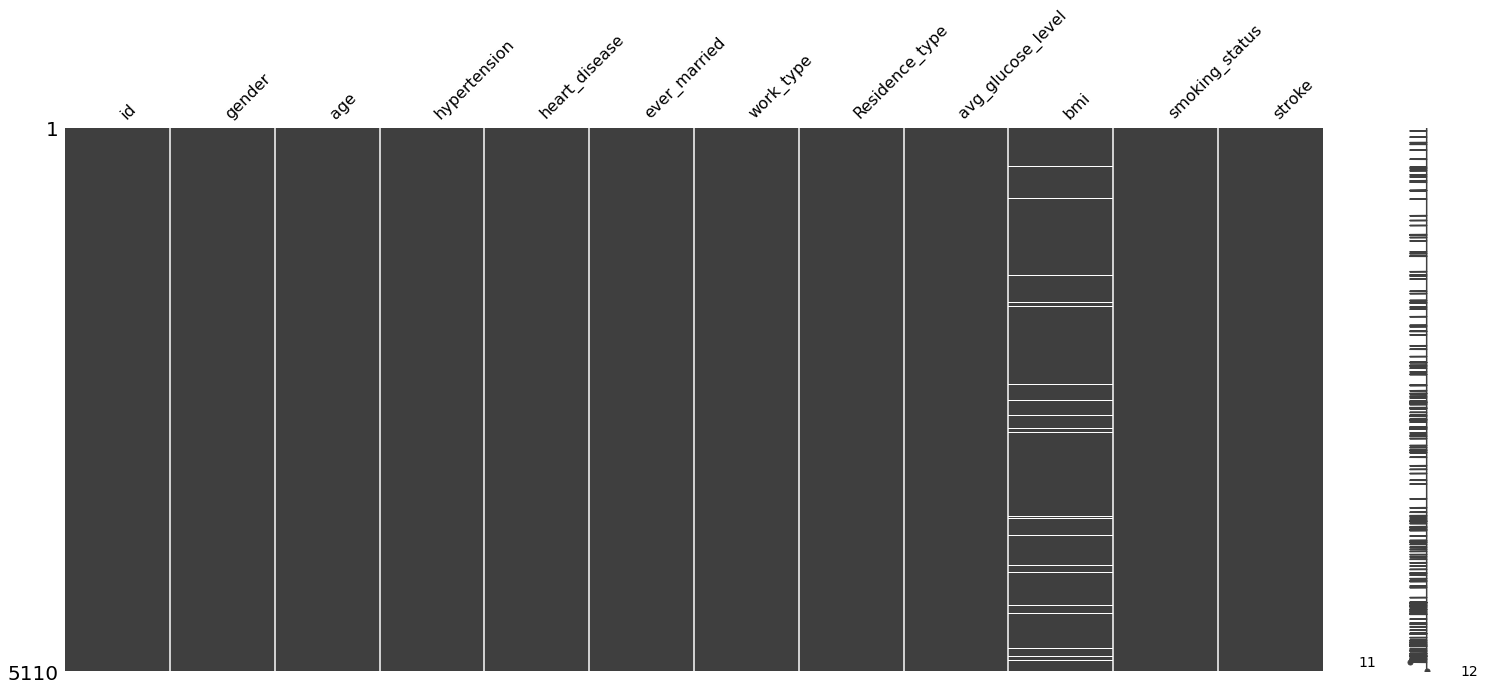

In [8]:
import missingno as msno
msno.matrix(stroke)

In [9]:
stroke['bmi'].ffill(inplace=True)

In [10]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [11]:
stroke.drop(['id'], axis = 1, inplace = True)

In [12]:
stroke.drop([5109], inplace = True)

In [13]:
stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
1,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
2,Female,0.32,0,0,No,children,Rural,55.86,16.0,Unknown,0
3,Female,0.32,0,0,No,children,Urban,108.63,19.6,Unknown,0
4,Female,0.40,0,0,No,children,Rural,85.65,17.4,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
5104,Male,82.00,0,0,Yes,Private,Urban,226.84,25.3,formerly smoked,0
5105,Male,82.00,0,0,Yes,Self-employed,Urban,111.81,19.8,formerly smoked,0
5106,Male,82.00,0,1,Yes,Private,Urban,57.56,27.5,never smoked,0
5107,Male,82.00,0,0,Yes,Private,Urban,217.57,33.5,formerly smoked,0


urban - 1, rural - 0;
gender: female - 1, male - 0;
maried - 1, not maried - 0.

In [14]:
stroke['gender'] =stroke['gender'].str.replace('Female','1')
stroke['gender'] =stroke['gender'].str.replace('Male','0')

In [15]:
stroke['ever_married'] =stroke['ever_married'].str.replace('Yes','1')
stroke['ever_married'] =stroke['ever_married'].str.replace('No','0')

In [16]:
stroke['Residence_type'] =stroke['Residence_type'].str.replace('Urban','1')
stroke['Residence_type'] =stroke['Residence_type'].str.replace('Rural','0')

In [17]:
stroke['gender'] = stroke['gender'].astype(float)
stroke['ever_married'] = stroke['ever_married'].astype(float)
stroke['Residence_type'] = stroke['Residence_type'].astype(float)

In [18]:
work_type = pd.get_dummies(stroke['work_type'])
smoking = pd.get_dummies(stroke['smoking_status']) 

In [19]:
new_stroke = pd.concat([stroke, work_type], axis=1)
new_stroke = pd.concat([new_stroke, smoking], axis=1)
new_stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes
0,1.0,0.08,0,0,0.0,children,1.0,139.67,14.1,Unknown,0,0,0,0,0,1,1,0,0,0
1,1.0,0.32,0,0,0.0,children,0.0,73.71,16.2,Unknown,0,0,0,0,0,1,1,0,0,0
2,1.0,0.32,0,0,0.0,children,0.0,55.86,16.0,Unknown,0,0,0,0,0,1,1,0,0,0
3,1.0,0.32,0,0,0.0,children,1.0,108.63,19.6,Unknown,0,0,0,0,0,1,1,0,0,0
4,1.0,0.40,0,0,0.0,children,0.0,85.65,17.4,Unknown,0,0,0,0,0,1,1,0,0,0


# Normalization

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

x = new_stroke['age'].values.reshape(-1, 1) 
x_scaled = scaler.fit_transform(x)
new_stroke['norm_age'] = x_scaled

In [22]:
scaler1 = MinMaxScaler()
x = new_stroke['bmi'].values.reshape(-1, 1) 
x_scaled = scaler1.fit_transform(x)
new_stroke['norm_bmi'] = x_scaled

In [23]:
scaler2 = MinMaxScaler()
x = new_stroke['avg_glucose_level'].values.reshape(-1, 1) 
x_scaled = scaler2.fit_transform(x)
new_stroke['norm_avg_glucose_level'] = x_scaled

In [24]:
new_stroke.drop(columns=['bmi', 'avg_glucose_level', 'age', 'work_type','smoking_status'], inplace = True)


# Oversampling

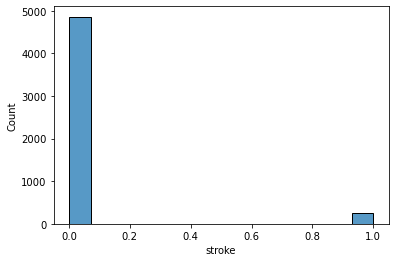

In [25]:
import seaborn as sns

# Checking if Data is balanced
sns.histplot(new_stroke['stroke'])

In [26]:
print(new_stroke['stroke'].value_counts())

0    4860
1     249
Name: stroke, dtype: int64


In [27]:
new_stroke.head()

,gender,hypertension,heart_disease,ever_married,Residence_type,stroke,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes,norm_age,norm_bmi,norm_avg_glucose_level
0,1.0,0,0,0.0,1.0,0,0,0,0,0,1,1,0,0,0,0.000000,0.043528,0.390315
1,1.0,0,0,0.0,0.0,0,0,0,0,0,1,1,0,0,0,0.002930,0.067583,0.085818
2,1.0,0,0,0.0,0.0,0,0,0,0,0,1,1,0,0,0,0.002930,0.065292,0.003416
3,1.0,0,0,0.0,1.0,0,0,0,0,0,1,1,0,0,0,0.002930,0.106529,0.247022
4,1.0,0,0,0.0,0.0,0,0,0,0,0,1,1,0,0,0,0.003906,0.081329,0.140938


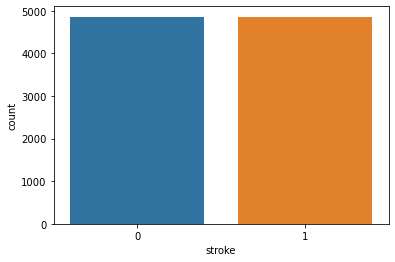

In [28]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state = 42)
X = new_stroke.drop(['stroke'],axis=1)
y = new_stroke[['stroke']]
X,y= sampler.fit_resample(X,y['stroke'].values.ravel())
y = pd.DataFrame({'stroke':y})
sns.countplot(data = y, x = 'stroke', y= None)
plt.show()

In [29]:
new_stroke_s = pd.concat([X,y],axis = 1)
new_stroke_s

,gender,hypertension,heart_disease,ever_married,Residence_type,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes,norm_age,norm_bmi,norm_avg_glucose_level,stroke
0,1.0,0,0,0.0,1.0,0,0,0,0,1,1,0,0,0,0.000000,0.043528,0.390315,0
1,1.0,0,0,0.0,0.0,0,0,0,0,1,1,0,0,0,0.002930,0.067583,0.085818,0
2,1.0,0,0,0.0,0.0,0,0,0,0,1,1,0,0,0,0.002930,0.065292,0.003416,0
3,1.0,0,0,0.0,1.0,0,0,0,0,1,1,0,0,0,0.002930,0.106529,0.247022,0
4,1.0,0,0,0.0,0.0,0,0,0,0,1,1,0,0,0,0.003906,0.081329,0.140938,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9715,0.0,0,0,1.0,1.0,0,0,0,0,0,0,1,0,0,0.951862,0.156611,0.840663,1
9716,1.0,0,0,1.0,0.0,0,0,1,0,0,0,1,0,0,0.538240,0.171071,0.154621,1
9717,1.0,0,0,1.0,0.0,0,0,1,0,0,0,0,1,0,0.987793,0.190901,0.534074,1
9718,1.0,0,0,1.0,1.0,0,0,0,1,0,1,0,0,0,0.941563,0.193305,0.092271,1


In [30]:
new_stroke_s = new_stroke_s.sample(frac = 1)

In [31]:
new_stroke_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9720 entries, 1904 to 11
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  9720 non-null   float64
 1   hypertension            9720 non-null   int64  
 2   heart_disease           9720 non-null   int64  
 3   ever_married            9720 non-null   float64
 4   Residence_type          9720 non-null   float64
 5   Govt_job                9720 non-null   uint8  
 6   Never_worked            9720 non-null   uint8  
 7   Private                 9720 non-null   uint8  
 8   Self-employed           9720 non-null   uint8  
 9   children                9720 non-null   uint8  
 10  Unknown                 9720 non-null   uint8  
 11  formerly smoked         9720 non-null   uint8  
 12  never smoked            9720 non-null   uint8  
 13  smokes                  9720 non-null   uint8  
 14  norm_age                9720 non-null  

# LinReg

In [32]:
alpha = 0.01 
iters = 100000 
th = 1e-5 
random_state = 2021 
 
#split  
 
 
def sigmoid(X, w): 
    s = 1/(1 + np.exp(-(X * w).sum(axis=1))) 
    return s 
 
 
def fit_predict(X, y, X_test): 
    X = np.array(X, dtype=np.dtype('float64')) 
    y = np.array(y, dtype=np.dtype('int64')).squeeze() 
    X = np.concatenate( 
                [np.ones(shape=(len(X), 1)), X], 
                axis=1 
            ) 
     
    rs = np.random.RandomState(seed= random_state) 
 
    w = rs.normal(size=(X.shape[1], )) 
            # Gradient descent 
    for _ in range(iters): 
        grad = ((sigmoid(X, w) - y)[:, np.newaxis] * X).sum(axis=0) 
        w -= alpha * grad 
        if all(np.absolute(grad) < th): 
            break 
        intercept = w[0] 
        coef = w[1:] 
         
    X_test = np.array(X_test, dtype=np.dtype('float64')) 
    proba=False 
    threshold= 0.5 
    X_test = np.concatenate([np.ones(shape=(X_test.shape[0], 1)), X_test], axis=1) 
            # Calculate the probabilities. 
    proba = sigmoid(X_test, w) 
    y_hat = np.zeros(shape=(proba.shape[0], )) 
    y_hat[proba >= threshold] = 1 
    return y_hat

In [33]:
import numpy as np 
from sklearn.model_selection import train_test_split 
X = new_stroke_s.drop("stroke", axis=1) 
y = new_stroke_s["stroke"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=2021) 
y_pred = fit_predict(X_train, y_train, X_test)

In [34]:
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred,output_dict=True) 
pd.DataFrame(cr)

,0,1,accuracy,macro avg,weighted avg
precision,0.977208,0.651310,0.729767,0.814259,0.814259
recall,0.470508,0.989026,0.729767,0.729767,0.729767
f1-score,0.635185,0.785403,0.729767,0.710294,0.710294
support,1458.000000,1458.000000,0.729767,2916.000000,2916.000000
